# Project: Investigate a Dataset - [Gapminder world]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The data set of this project is from Gapminder, and contains a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators which are population, income per person, average child per woman (fertility), and life expectancy (average number of years a new born child would live)  


### Question(s) for Analysis
> Q1/ Are population levels of countries and income per person in those countries related?

> Q2/ Which continent has the highest in average income per person across the last 42 years? And wich continents come in the second and third places?

>  Q3/ Is there a relationship between population levels and child per woman (fertility)?

>  Q4/ Can we say that population and life expectancy are related to each other?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_pop = pd.read_csv('population_total.csv')
df_inc = pd.read_csv('income_per_person.csv')
df_fert = pd.read_csv('total_fertility.csv')
df_life = pd.read_csv('life_expectancy_years.csv')

In [4]:
# inspecting the first rows of population
df_pop.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [5]:
# inspecting the first rows of income
df_inc.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


In [6]:
# inspecting the first rows of fertility(child per woman)
df_fert.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


In [7]:
# inspecting the first rows of life(averave life expactancy for new born child)
df_life.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [8]:
# convert years from being a row into a column and giving it a column name year - poulation data, and check changes
df_pop = pd.melt(df_pop, id_vars=['country'], var_name="year", value_vars=df_pop.columns[1:], value_name= "population")
df_pop

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
5,Argentina,1800,534k
6,Armenia,1800,413k
7,Antigua and Barbuda,1800,37k
8,Australia,1800,200k
9,Austria,1800,3M


In [9]:
# convert years from being a row into a column and giving it a column name year - income data, and check changes
df_inc = pd.melt(df_inc, id_vars=['country'], var_name="year", value_vars=df_inc.columns[1:], value_name= "income")
df_inc

,country,year,income
0,Afghanistan,1800,683
1,Angola,1800,700
2,Albania,1800,755
3,Andorra,1800,1360
4,United Arab Emirates,1800,1130
5,Argentina,1800,1730
6,Armenia,1800,582
7,Antigua and Barbuda,1800,857
8,Australia,1800,925
9,Austria,1800,2090


In [10]:
# convert years from being a row into a column and giving it a column name year - fertility data, and check changes
df_fert = pd.melt(df_fert, id_vars=['country'], var_name="year", value_vars=df_fert.columns[1:], value_name= "child_per_woman")
df_fert

,country,year,child_per_woman
0,Aruba,1800,5.64
1,Afghanistan,1800,7.00
2,Angola,1800,6.93
3,Albania,1800,4.60
4,Netherlands Antilles,1800,5.80
5,United Arab Emirates,1800,6.94
6,Argentina,1800,6.80
7,Armenia,1800,7.80
8,Antigua and Barbuda,1800,5.00
9,Australia,1800,6.50


In [11]:
# convert years from being a row into a column and giving it a column name year - life expectancy data, and check changes
df_life = pd.melt(df_life, id_vars=['country'], var_name="year", value_vars=df_life.columns[1:], value_name= "life_expectancy")
df_life

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Angola,1800,27.0
2,Albania,1800,35.4
3,Andorra,1800,NaN
4,United Arab Emirates,1800,30.7
5,Argentina,1800,33.2
6,Armenia,1800,34.0
7,Antigua and Barbuda,1800,33.5
8,Australia,1800,34.0
9,Austria,1800,34.4


In [12]:
# merge data of population and income into a single dataframe, and show the dataframe 
df = pd.merge(df_pop, df_inc, on = ['country', 'year'])
df

,country,year,population,income
0,Afghanistan,1800,3.28M,683
1,Angola,1800,1.57M,700
2,Albania,1800,400k,755
3,Andorra,1800,2650,1360
4,United Arab Emirates,1800,40.2k,1130
5,Argentina,1800,534k,1730
6,Armenia,1800,413k,582
7,Antigua and Barbuda,1800,37k,857
8,Australia,1800,200k,925
9,Austria,1800,3M,2090


In [13]:
# merge the fertility data into the dataframa we prviously created, and show the dataframe after merge
df = pd.merge(df, df_fert, on = ['country', 'year'])
df

,country,year,population,income,child_per_woman
0,Afghanistan,1800,3.28M,683,7.00
1,Angola,1800,1.57M,700,6.93
2,Albania,1800,400k,755,4.60
3,United Arab Emirates,1800,40.2k,1130,6.94
4,Argentina,1800,534k,1730,6.80
5,Armenia,1800,413k,582,7.80
6,Antigua and Barbuda,1800,37k,857,5.00
7,Australia,1800,200k,925,6.50
8,Austria,1800,3M,2090,5.10
9,Azerbaijan,1800,880k,877,8.10


In [14]:
# merge the life expectancy data into the dataframa we prviously created, and show the dataframe after merge
df = pd.merge(df, df_life, on = ['country', 'year'])
df

,country,year,population,income,child_per_woman,life_expectancy
0,Afghanistan,1800,3.28M,683,7.00,28.2
1,Angola,1800,1.57M,700,6.93,27.0
2,Albania,1800,400k,755,4.60,35.4
3,United Arab Emirates,1800,40.2k,1130,6.94,30.7
4,Argentina,1800,534k,1730,6.80,33.2
5,Armenia,1800,413k,582,7.80,34.0
6,Antigua and Barbuda,1800,37k,857,5.00,33.5
7,Australia,1800,200k,925,6.50,34.0
8,Austria,1800,3M,2090,5.10,34.4
9,Azerbaijan,1800,880k,877,8.10,29.2


In [15]:
# find number of rows and columns
df.shape

(46686, 6)

In [16]:
# check if there are null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46686 entries, 0 to 46685
Data columns (total 6 columns):
country            46686 non-null object
year               46686 non-null object
population         46686 non-null object
income             46686 non-null object
child_per_woman    46686 non-null float64
life_expectancy    46686 non-null float64
dtypes: float64(2), object(4)
memory usage: 2.5+ MB


In [17]:
# show number of null values in each column
df.isnull().sum()

country            0
year               0
population         0
income             0
child_per_woman    0
life_expectancy    0
dtype: int64

In [18]:
# check data types
df.dtypes

country             object
year                object
population          object
income              object
child_per_woman    float64
life_expectancy    float64
dtype: object

In [19]:
# check for duplicates
sum(df.duplicated())

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [20]:
# change the data type of year column into int.
df.year = df.year.astype(int)

In [21]:
# check changing the data type of year column
df.dtypes

country             object
year                 int64
population          object
income              object
child_per_woman    float64
life_expectancy    float64
dtype: object

Now, we have changed the year column data type into int

In [22]:
# trim the dataset to include years from 1980 till 2022 which is the period under investigation
df = df.query('year >= 1980 and year < 2022')

In [23]:
# check the year column for changes made on it
df.year

33480    1980
33481    1980
33482    1980
33483    1980
33484    1980
         ... 
41287    2021
41288    2021
41289    2021
41290    2021
41291    2021
Name: year, Length: 7812, dtype: int64

Thus, we successfully trimmed the dataset to include the years from 1980 till 2022!

In [24]:
# check the number of rows after trimming
df.shape

(7812, 6)

In [25]:
# replace k, K, M, and B in population column with 1000, 1000000, 1000000000, and convert its type into float
df.population = df.population.replace(r'[kKMB]+$', '', regex=True).astype(float) * df.population.str.extract(r'[\d\.]+([KkMB]+)', expand=False).fillna(1).replace(['K', 'k', 'M', 'B'], [10**3,10**3, 10**6, 10**9]).astype(int)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
# check that changes have took place
df.head()

,country,year,population,income,child_per_woman,life_expectancy
33480,Afghanistan,1980,13400000.0,1190,7.45,43.7
33481,Angola,1980,8340000.0,1780,7.50,48.1
33482,Albania,1980,2680000.0,4470,3.62,71.3
33483,United Arab Emirates,1980,1020000.0,93.8k,5.51,67.6
33484,Argentina,1980,27900000.0,17.1k,3.33,70.2


In [27]:
df.dtypes

country             object
year                 int64
population         float64
income              object
child_per_woman    float64
life_expectancy    float64
dtype: object

We successfully replaced the letters K, M, and B into the corresponding numbers and converted the column type into foat

In [28]:
# for the income column If the value is a string, then remove k, K, M, or B with the corresponding value 1000, 1000000, or 1000000000 and convert its type into float
df.income = df.income.replace(r'[kKMB]+$', '', regex=True).astype(float) * df.income.str.extract(r'[\d\.]+([KkMB]+)', expand=False).fillna(1).replace(['K', 'k', 'M', 'B'], [10**3,10**3, 10**6, 10**9]).astype(int)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [29]:
# check that changes have took place
df.head()

,country,year,population,income,child_per_woman,life_expectancy
33480,Afghanistan,1980,13400000.0,1190.0,7.45,43.7
33481,Angola,1980,8340000.0,1780.0,7.50,48.1
33482,Albania,1980,2680000.0,4470.0,3.62,71.3
33483,United Arab Emirates,1980,1020000.0,93800.0,5.51,67.6
33484,Argentina,1980,27900000.0,17100.0,3.33,70.2


In [30]:
# check change of data type
df.dtypes

country             object
year                 int64
population         float64
income             float64
child_per_woman    float64
life_expectancy    float64
dtype: object

We successfully replaced the letters K, M, and B into the corresponding numbers and converted the column type into foat

In [31]:
# install of Python package pycountry to be able to get continent names from list of countries
!pip install pycountry_convert

In [32]:
# load the pycountry_convert package
import pycountry_convert as pc

In [33]:
# create a new column named continent that contains the corresponding continent for each country
def country_to_continent(country_name):
    '''
    to get the continent name corresponding to the country in the row
    input = Spain
    Output = Europe
    '''
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "None"

df['continent'] = df['country'].apply(country_to_continent)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [34]:
# check the dataset with the new column 'continent'
df.head(50)

,country,year,population,income,child_per_woman,life_expectancy,continent
33480,Afghanistan,1980,1.340000e+07,1190.0,7.45,43.7,Asia
33481,Angola,1980,8.340000e+06,1780.0,7.50,48.1,Africa
33482,Albania,1980,2.680000e+06,4470.0,3.62,71.3,Europe
33483,United Arab Emirates,1980,1.020000e+06,93800.0,5.51,67.6,Asia
33484,Argentina,1980,2.790000e+07,17100.0,3.33,70.2,South America
33485,Armenia,1980,3.100000e+06,6920.0,2.39,70.2,Asia
33486,Antigua and Barbuda,1980,6.190000e+04,7910.0,2.12,72.1,North America
33487,Australia,1980,1.460000e+07,26300.0,1.90,74.5,Oceania
33488,Austria,1980,7.610000e+06,28900.0,1.65,72.8,Europe
33489,Azerbaijan,1980,6.150000e+06,7700.0,3.50,66.2,Asia


We successfully created a column containing the continent name of each country!

In [35]:
# check unique values and their counts in the continent column
df.continent.value_counts()

Africa           2142
Asia             1974
Europe           1638
North America     840
South America     504
Oceania           378
None              336
Name: continent, dtype: int64

In [36]:
# drop rows containing a continent column value of None
df.drop(df.index[df['continent'] == 'None'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
# check removal of rows with none values in continent column
df.head(50)

,country,year,population,income,child_per_woman,life_expectancy,continent
33480,Afghanistan,1980,1.340000e+07,1190.0,7.45,43.7,Asia
33481,Angola,1980,8.340000e+06,1780.0,7.50,48.1,Africa
33482,Albania,1980,2.680000e+06,4470.0,3.62,71.3,Europe
33483,United Arab Emirates,1980,1.020000e+06,93800.0,5.51,67.6,Asia
33484,Argentina,1980,2.790000e+07,17100.0,3.33,70.2,South America
33485,Armenia,1980,3.100000e+06,6920.0,2.39,70.2,Asia
33486,Antigua and Barbuda,1980,6.190000e+04,7910.0,2.12,72.1,North America
33487,Australia,1980,1.460000e+07,26300.0,1.90,74.5,Oceania
33488,Austria,1980,7.610000e+06,28900.0,1.65,72.8,Europe
33489,Azerbaijan,1980,6.150000e+06,7700.0,3.50,66.2,Asia


In [38]:
# check unique values and their counts in the continent column after removal of none values
df.continent.value_counts()

Africa           2142
Asia             1974
Europe           1638
North America     840
South America     504
Oceania           378
Name: continent, dtype: int64

We have successfully deleted the rows with none values in the continent column

In [39]:
# confirm data types of each column in the dataset
df.dtypes

country             object
year                 int64
population         float64
income             float64
child_per_woman    float64
life_expectancy    float64
continent           object
dtype: object

In [40]:
# save the dataframe in a csv file named gapminder_dataset1.csv
df.to_csv('gapminder_dataset1.csv', index=False)

We have successfully saved our new clean dataset in the csv file named: 'gapminder_dataset1.csv'

<a id='eda'></a>
## Exploratory Data Analysis


In this stage we will go in the depth of our dataset, to get very important measures, for example we will study how population levels are related to the levels of income per person. Also another question we will answer is Which continent have the highest average af income per person along the previous 42 years!

Moreover, we will study the relationship between fertility and life from one side and population levels from the other side .... Let's Go!  





### Research Question 1 ( Are population levels of countries and income per person in those countries related?

In [41]:
# explore the dataset
df.describe()

,year,population,income,child_per_woman,life_expectancy
count,7476.000000,7.476000e+03,7476.000000,7476.000000,7476.000000
mean,2000.500000,3.418407e+07,15535.339486,3.427781,68.368967
std,12.121729,1.284499e+08,17740.017174,1.814881,9.013872
min,1980.000000,5.930000e+04,385.000000,0.900000,9.500000
25%,1990.000000,2.200000e+06,3120.000000,1.880000,62.400000
50%,2000.500000,7.500000e+06,9000.000000,2.820000,70.300000
75%,2011.000000,2.180000e+07,20300.000000,4.840000,75.100000
max,2021.000000,1.440000e+09,128000.000000,8.870000,85.100000


Now, we have the different statistics for our dataset 

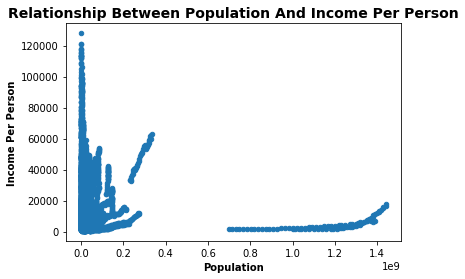

In [42]:
# draw a scatter plot to show the relationship betweeen country's population and income per person
df.plot(x="population", y="income", kind="scatter")
plt.title('Relationship Between Population and Income Per Person'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Population'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Income Per Person'.title(),
               fontsize = 10, weight = "bold");

We used a scatter plot to show us how data are scattered across the two variables.
Here, we can observe that there is an inverse (negative) relationship between population and income per person.

### Research Question 2  (Which continent has the highest in average income per person across the last 42 years? And which continents come in the second and third places?)

To answer this question, we have to group our data by continent and to get the mean incomes for each of them, after that we can graph our data (the best chart will be the bar chart to see the results more clear)

In [43]:
# get the mean income for each continent, and show the dataframe
cont = df.groupby('continent').income.mean()
cont

continent
Africa            4523.142390
Asia             17616.796859
Europe           29635.628816
North America    15102.678571
Oceania          11331.164021
South America    12233.095238
Name: income, dtype: float64

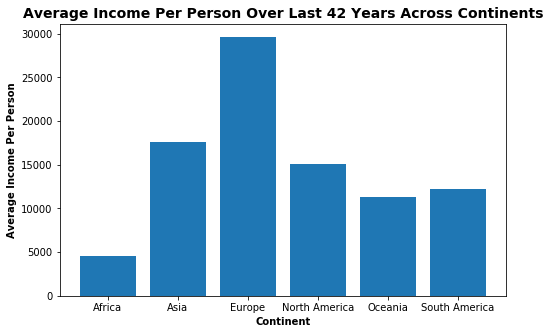

In [44]:
# draw a bar chart to show the continents with highest income per person
plt.subplots(figsize=(8, 5))
plt.bar(cont.index, cont)
plt.title('Average Income Per Person Over Last 42 Years Across Continents'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Continent'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Average Income Per Person'.title(),
               fontsize = 10, weight = "bold");

From the bar chart above we can see that Europe is the highest continent in the average income per person across the last 42 years, followed by Asia and North America continents.

### Research Question 3  (Is there a relationship between population levels and child per woman (fertility)?)

A scatter plot will best describe this relationship, here we go!

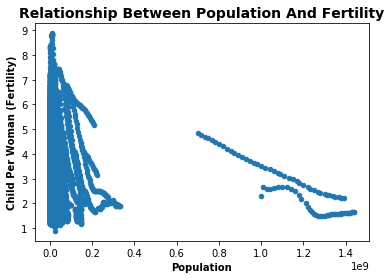

In [45]:
# draw a scatter plot to show the relationship between population levels and child per woman (fertility)
df.plot(x="population", y="child_per_woman", kind="scatter")
plt.title('Relationship Between Population and Fertility'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Population'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Child Per Woman (Fertility)'.title(),
               fontsize = 10, weight = "bold");

Obviously there is a negative relationship between fertility ( number of child per woman) and population levels

### Research Question 4 (Can we say that population and life expectancy are related to each other?)

Another scatter will make this relation very obvious as we will see next!

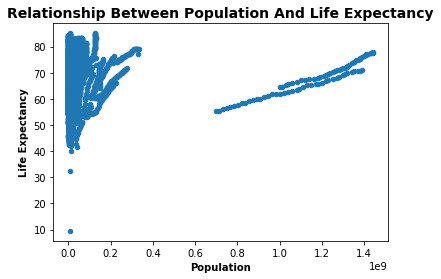

In [46]:
## draw a scatter plot to show the relationship between population levels and life expectancy
df.plot(x="population", y="life_expectancy", kind="scatter")
plt.title('Relationship Between Population and Life Expectancy'.title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Population'.title(),
               fontsize = 10, weight = "bold")
plt.ylabel('Life Expectancy'.title(),
               fontsize = 10, weight = "bold");

Here, we get that there is a positive relationship exists between population levels and life expectancy

<a id='conclusions'></a>
## Conclusions

> **1**: From the above analysis we can conclude that there is an inverse (negative) relationship between population and income per person, which means that high levels of income per person are in countries with low population and vice versa.

> **2**: Europe is the highest continent in the average income per person across 42 years, followed by Asia and North America continents with slight difference between the last two continents.

> **3**: We can observe from our analysis that there is a negative relationship between fertility ( number of child per woman) and population levels, and futher investigation is needed here to know reasons stand behind this relationship.

> **4**: On the other hand it is obvious that a positive relationship exists between population levels and life expectancy (average number years a new born child would live), as when population is hight the number of years of life expectancy increases and vice versa. 

> **Limitation**: More data needed to investigate the negative relationship between fertility ( number of child per woman) and population levels and the reasons stand behind this relationship.


## Submitting your Project 



In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Copy2.ipynb'])

0